In [149]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids
from sklearn.preprocessing import scale
from sklearn.metrics import silhouette_score
from sklearn.manifold import TSNE
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics
from sklearn.decomposition import TruncatedSVD
from scipy.cluster.hierarchy import dendrogram


In [150]:
# DEFS

def clustering_kmeans(n, data):
    # Creamos el modelo con la funcion KMeans, al cual debemos pasarle 
    # el numero de clusters, que previamente definimos con el parametro de la funcion 'n'
    kmeans = KMeans(n_clusters = n, random_state = 10)
    # Ajustamos el modelo a los datos que le pasamos a la funcion, con el metodo .fit()
    kmeans.fit(X = data)
    # Obtenemos etiquetas de cluster asignado a cada ejemplo
    y_predict = kmeans.labels_
    # Creamos una paleta con base en la paleta 'husl' con el numero de clusters 'n' de colores
    palette = sns.color_palette("husl", n)
    # Devolvemos el modelo, las predicciones y la paleta
    return(kmeans, y_predict, palette)

def hierarchical_clustering(n, data):  
    # Creamos el modelo con la funcion AgglomerativeClustering, a la cual debemos pasarle el numero de clusters, que previamente definimos con el parametro de la funcion 'n' y el metodo para obtener las distancias, en este caso euclidiano
    hierchclust = AgglomerativeClustering(n_clusters = n, affinity = 'euclidean')  
    # Ajustamos el modelo
    hierchclust.fit(data)
    # Obtenemos etiquetas de cluster asignado a cada ejemplo
    y_predict = hierchclust.labels_
    # Creamos una paleta con base en la paleta 'husl' con el numero de clusters 'n' de colores
    palette = sns.color_palette("husl", n) 
    # Devolvemos el modelo, las predicciones y la paleta
    return(hierchclust, y_predict, palette)  

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)


# Modificacion de datos

In [151]:
# Cargamos los datos
data = pd.read_csv('.\data\heart_failure_clinical_records_dataset.csv')
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [152]:
# Quitamos las caracteristicas time y DEATH_EVENT
data.drop('time', inplace=True, axis=1)
dataClass = data['DEATH_EVENT']
data.drop('DEATH_EVENT', inplace=True, axis=1)

In [153]:
# Aqui elegimos que caracteristicas queremos usar para el clustering

Rdata = data.iloc[:,[0,4,7,8]]   # las caracteristicas que vimos reelevantes
# Rdata = data  # todas las caracteristicas
# Rdata = data.iloc[:,[0,2,4,6,7,8]]   # Sin binarias

In [154]:
# Escalamos los datos
data_scaled = scale(X = Rdata, axis = 0, with_mean = True, with_std = True) 
data_scaled = pd.DataFrame(data_scaled, columns = Rdata.columns, index = Rdata.index)
data_scaled.head()

,age,ejection_fraction,serum_creatinine,serum_sodium
0,1.192945,-1.530560,0.490057,-1.504036
1,-0.491279,-0.007077,-0.284552,-0.141976
2,0.350833,-1.530560,-0.090900,-1.731046
3,-0.912335,-1.530560,0.490057,0.085034
4,0.350833,-1.530560,1.264666,-4.682176


# t-SNE y k-means; 2 clusters

In [155]:
# Reduccion de dimensionalidad t-SNE
tsne = TSNE(random_state = 10)
X_embedded = tsne.fit_transform(data_scaled)

Text(0.5, 1.0, 'Reduccion de dimensionalidad t-SNE')

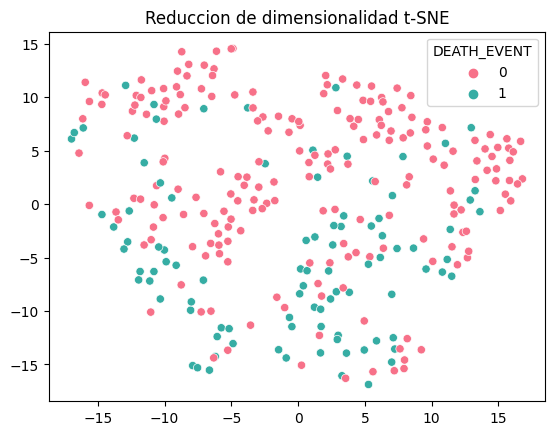

In [156]:
# Ploteamos
palette = sns.color_palette("husl", 2)
sns.scatterplot(x=X_embedded[:,0], y=X_embedded[:,1],hue = dataClass, legend = 'full', palette = palette)

plt.title("Reduccion de dimensionalidad t-SNE")


c:\Users\cerot\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Text(0.5, 1.0, 'Clustering K-means')

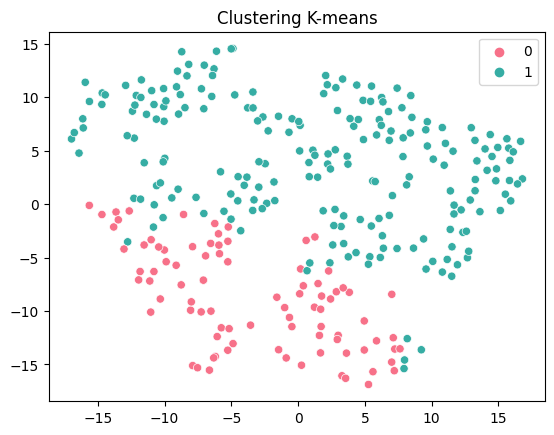

In [157]:
kmeans, y_predict, palette = clustering_kmeans(2, data_scaled)
# Graficamos el clustering que nos devolvio KMeans
sns.scatterplot(x=X_embedded[:,0], y=X_embedded[:,1], hue = y_predict, legend = 'full', palette = palette)
plt.title("Clustering K-means")

In [158]:
# Evaluamos

labels_true = dataClass
labels_pred = y_predict

# Evaluaciones 
print("Rand index: {}".format(metrics.adjusted_rand_score(labels_true, labels_pred)))
print("Homogeneity: {}".format(metrics.homogeneity_score(labels_true, labels_pred)))
print("Completeness: {}".format(metrics.completeness_score(labels_true, labels_pred)))
print("V-measure: {}".format(metrics.v_measure_score(labels_true, labels_pred)))

Rand index: 0.2096848779118595
Homogeneity: 0.11640847619495259
Completeness: 0.12057785631712996
V-measure: 0.1184564896038079


# K-means numero de cluster predicho; Inercia y Silueta

c:\Users\cerot\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\cerot\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\cerot\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\cerot\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value 

Text(0, 0.5, 'Inercia')

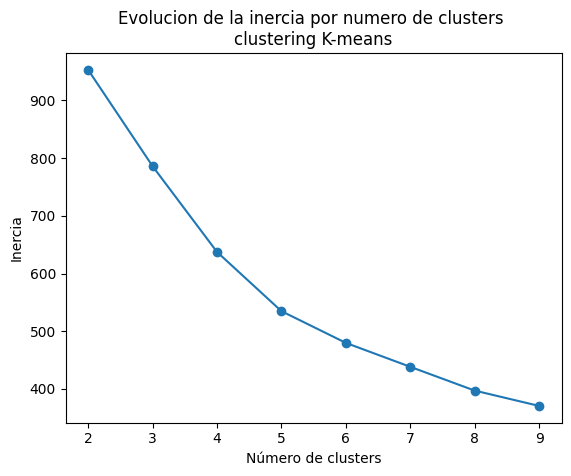

In [159]:
# Metodo de Inercia

inertias = []
# En este caso, vamos a ajustar 9 modelos, desde k = 2 hasta k = 10.
for n in range(2, 10):
    # Ajustamos el modelo con el valor de k de cada iteracion
    kmeans, y_predict, palette = clustering_kmeans(n, data_scaled)
    # Almacenamos el valor de la inercia obtenido con el metodo .inercia() a la lista
    inertias.append(kmeans.inertia_)

# Se grafica
fig, ax = plt.subplots(1, 1)
ax.plot(range(2, 10), inertias, marker = 'o')
ax.set_title("Evolucion de la inercia por numero de clusters \nclustering K-means")
ax.set_xlabel('Número de clusters')
ax.set_ylabel('Inercia')

c:\Users\cerot\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\cerot\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\cerot\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\cerot\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value 

Text(0, 0.5, 'Silueta')

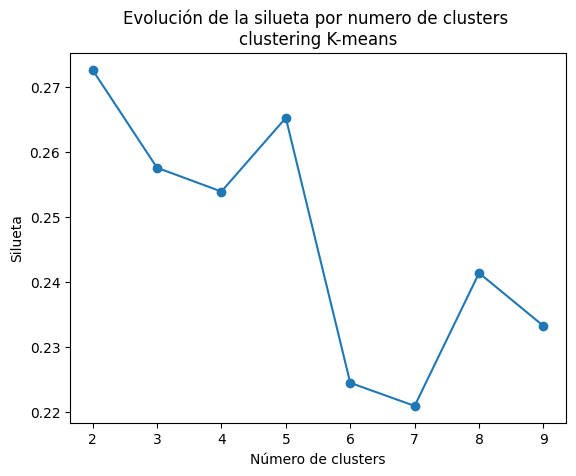

In [160]:
# Metodo de silueta

silhouettes = []

# Ajustamos modelos desde k = 2 hasta k = 10
for n in range(2, 10):
    # Ajustamos el modelo con el valor de k de cada iteracion
    kmeans, y_predict, palette = clustering_kmeans(n, data_scaled)

    silhouette = silhouette_score(data_scaled, y_predict)
    silhouettes.append(silhouette)
    
# Se Grafica
fig, ax = plt.subplots(1, 1)
ax.plot(range(2, 10), silhouettes, marker = 'o')
ax.set_title("Evolución de la silueta por numero de clusters \nclustering K-means")
ax.set_xlabel('Número de clusters')
ax.set_ylabel('Silueta')

c:\Users\cerot\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Text(0.5, 1.0, 'Clustering K-means')

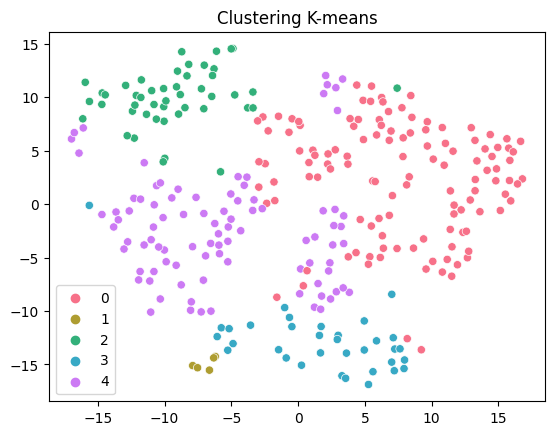

In [161]:
# Graficamos el clustering de k-means con el numero de clusters sugerido
kmeans, y_predict, palette = clustering_kmeans(5, data_scaled)
sns.scatterplot(x=X_embedded[:,0], y=X_embedded[:,1], hue = y_predict, legend = 'full', palette = palette)
plt.title("Clustering K-means")

In [162]:
labels_true = dataClass
labels_pred = y_predict

print("Rand index: {}".format(metrics.adjusted_rand_score(labels_true, labels_pred)))
print("Homogeneity: {}".format(metrics.homogeneity_score(labels_true, labels_pred)))
print("Completeness: {}".format(metrics.completeness_score(labels_true, labels_pred)))
print("V-measure: {}".format(metrics.v_measure_score(labels_true, labels_pred)))

Rand index: 0.05716155012683248
Homogeneity: 0.10093807068663722
Completeness: 0.04744923150843752
V-measure: 0.0645531499417509


# Clustering Jerarquico; Agglomerative Clustering

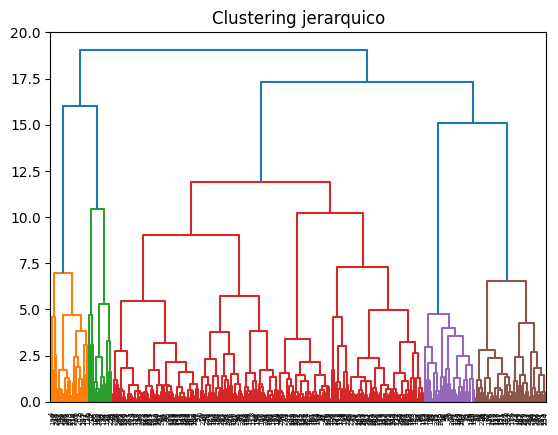

In [163]:
# Clustering jerarquico
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
model = model.fit(data_scaled)

plot_dendrogram(model, truncate_mode="level")
plt.title("Clustering jerarquico")
plt.show()

c:\Users\cerot\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
c:\Users\cerot\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
c:\Users\cerot\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
c:\Users\cerot\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
c:\Users\cerot\AppData\L

Text(0, 0.5, 'Silueta')

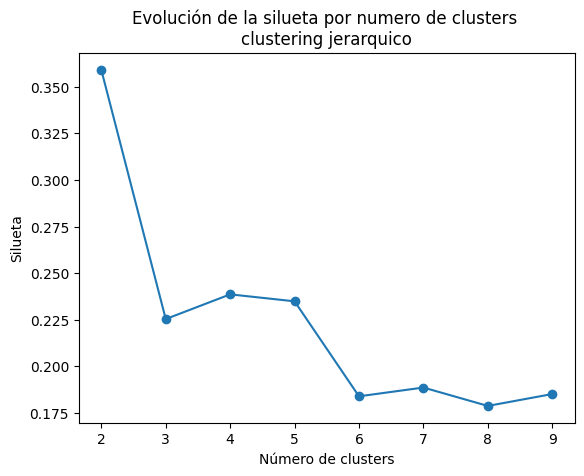

In [164]:
# Metodo de siluetas con clustering jerarquico
silhouettes = []

# Ajustamos modelos desde k = 2 hasta k = 10
for n in range(2, 10):
    # Ajustamos el modelo con el valor de k de cada iteracion
    hierchclust, y_predict, palette = hierarchical_clustering(n, data_scaled)
    # Obtenemos el valor de la silueta  con la funcion silhouette_score() con los datos y las predicciones
    silhouette = silhouette_score(data_scaled, y_predict)
    # Guardamos el valor de la silueta en la lista
    silhouettes.append(silhouette)

# Graficamos
fig, ax = plt.subplots(1, 1)
ax.plot(range(2, 10), silhouettes, marker = 'o')
ax.set_title("Evolución de la silueta por numero de clusters \nclustering jerarquico")
ax.set_xlabel('Número de clusters')
ax.set_ylabel('Silueta')

c:\Users\cerot\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Text(0.5, 1.0, 'Clustering jerarquico')

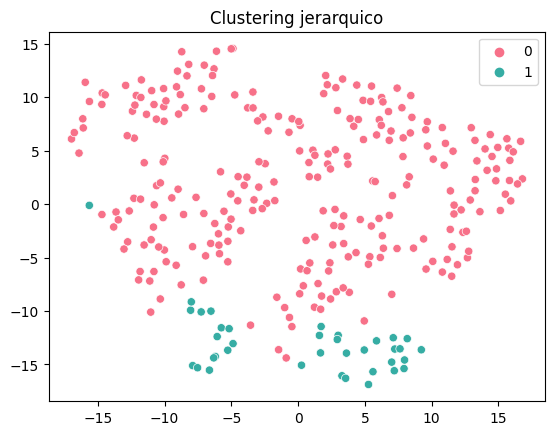

In [165]:
hierchclust, y_predict, palette = hierarchical_clustering(2, data_scaled)
sns.scatterplot(x=X_embedded[:,0], y=X_embedded[:,1], hue = y_predict, legend = 'full', palette = palette)
plt.title("Clustering jerarquico")

In [166]:
labels_true = dataClass
labels_pred = y_predict

print("Rand index: {}".format(metrics.adjusted_rand_score(labels_true, labels_pred)))
print("Homogeneity: {}".format(metrics.homogeneity_score(labels_true, labels_pred)))
print("Completeness: {}".format(metrics.completeness_score(labels_true, labels_pred)))
print("V-measure: {}".format(metrics.v_measure_score(labels_true, labels_pred)))

Rand index: 0.09714867490216128
Homogeneity: 0.03591197778320449
Completeness: 0.06021813435966417
V-measure: 0.04499219349825153


# Truncated SVD

In [167]:
nc = 4

# Definimos reductor de dimensionalidad
svd = TruncatedSVD(n_components=nc, random_state=10, n_iter=10)
# Reducimos datos de entrada y regresamos datos reducidos
X_reduced = svd.fit_transform(data_scaled)
# Determinamos varianza de datos de entrada que representamos con datos reducidos
exp_var = svd.explained_variance_ratio_.cumsum()
explained_variance = svd.explained_variance_ratio_.sum()
print("Explained variance of the SVD step: {}%".format(int(explained_variance * 100)))

Explained variance of the SVD step: 100%


In [168]:
# Reducimos la dimensionalidad de nuestros datos escalados
X_reduced_embedded = tsne.fit_transform(X_reduced)

c:\Users\cerot\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<Axes: >

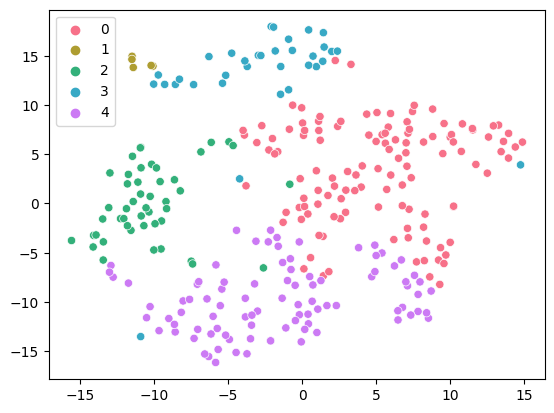

In [169]:
kmeans, y_predict, palette = clustering_kmeans(5, X_reduced)
sns.scatterplot(x=X_reduced_embedded[:,0], y=X_reduced_embedded[:,1], hue = y_predict, legend = 'full', palette = palette)

c:\Users\cerot\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\cerot\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\cerot\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\cerot\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value 

Text(0, 0.5, 'Silueta')

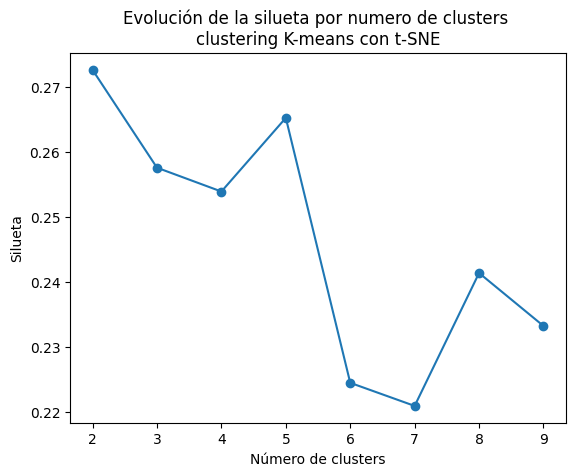

In [170]:
# Metodo silueta con los datos reducidos
silhouettes = []

for n in range(2, 10):
    kmeans, y_predict, palette = clustering_kmeans(n, X_reduced)
    silhouette = silhouette_score(X_reduced, y_predict)
    silhouettes.append(silhouette)

# Plot valores de silueta
fig, ax = plt.subplots(1, 1)
ax.plot(range(2, 10), silhouettes, marker = 'o')
ax.set_title("Evolución de la silueta por numero de clusters \nclustering K-means con t-SNE")
ax.set_xlabel('Número de clusters')
ax.set_ylabel('Silueta')